In [57]:
## importing important libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
## loading file

ipl_df = pd.read_csv('matches.csv')
ipl_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [59]:
ipl_df.shape

(756, 18)

In [60]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [61]:
## droping non important features .......... inplace = permanent changes

ipl_df.drop(columns=['umpire1','umpire2','umpire3'],inplace=True)

In [62]:
ipl_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [63]:
ipl_df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [64]:
ipl_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [65]:
## teams having multiple names now converting names 

ipl_df.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
ipl_df.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
ipl_df.team1.replace({ 'Delhi Capitals' : 'Delhi Daredevils'},inplace = True)
ipl_df.team2.replace({'Delhi Capitals' : 'Delhi Daredevils'},inplace = True)
ipl_df.toss_winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
ipl_df.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)

ipl_df.city.replace({'Bengaluru' : 'Bangalore'},inplace = True)

In [67]:
ipl_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [68]:
ipl_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali'], dtype=object)

In [69]:
ipl_df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [71]:
## finding missing values 

ipl_df.isnull().sum()

id                 0
Season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [77]:
## we have  null values so we replace 

null_df = ipl_df[ipl_df.isna().any(axis=1)]
null_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,IPL-2011,Delhi,21-05-2011,Delhi Daredevils,Rising Pune Supergiant,Delhi Capitals,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
461,462,IPL-2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,IPL-2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,IPL-2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,IPL-2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,IPL-2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,IPL-2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,IPL-2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium
545,546,IPL-2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,IPL-2015,Bangalore,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium


In [86]:
ipl_df.loc[[461,462,466,468,469,474,476],'city'] = "Dubai"

In [87]:
ipl_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali'], dtype=object)

In [98]:
## Analyse and Visualizationthe data with different features ........

In [99]:
## total matches 

ipl_df.id.count()

756

In [101]:
## Matches Where Result Was normal

regular_matches = ipl_df[ipl_df.result == 'normal'].count()
regular_matches.result

743

,city,id
0,Bloemfontein,2
1,Nagpur,3
2,Kimberley,3
3,East London,3
4,Kanpur,4
5,Kochi,5
6,Raipur,6
7,Sharjah,6
8,Abu Dhabi,7
9,Ranchi,7


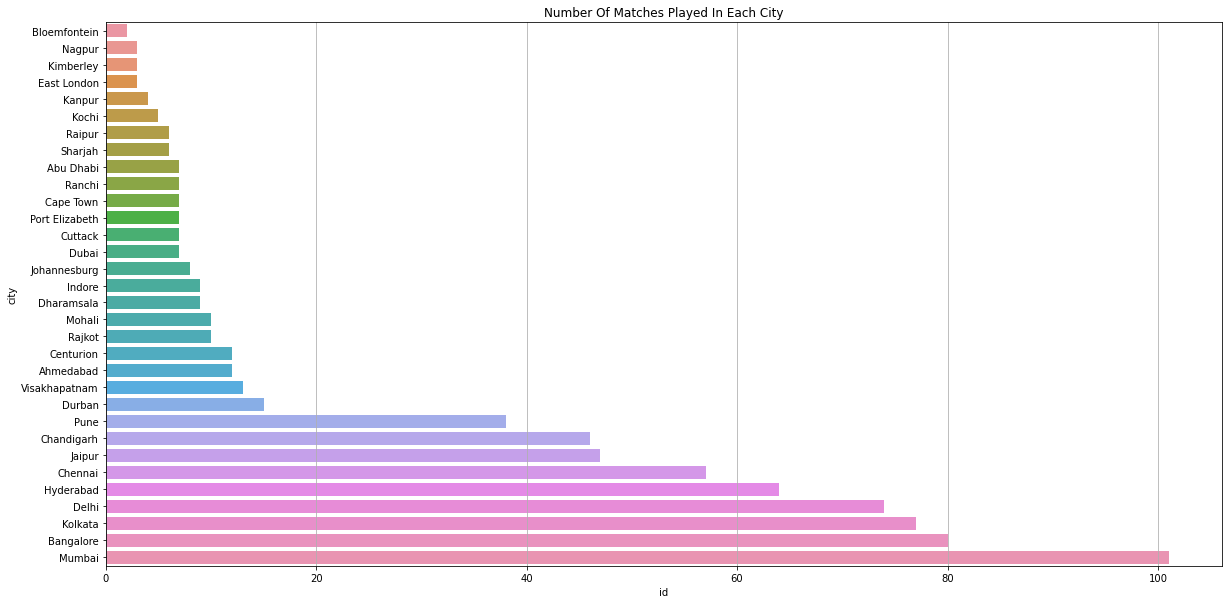

In [109]:
## total matches in different cites 

cities = ipl_df.groupby('city')[['id']].count()
cities = cities.sort_values('id',ascending=True).reset_index()

plt.figure(figsize=(20,10))
plt.grid()
plt.title('Number Of Matches Played In Each City')
sns.barplot(x='id',y='city',data=cities);

cities

,Teams,wins
0,Mumbai Indians,109
1,Chennai Super Kings,98
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,83
4,Kings XI Punjab,81
5,Delhi Capitals,76
6,Rajasthan Royals,75
7,Sunrisers Hyderabad,56
8,Deccan Chargers,29
9,Rising Pune Supergiant,27


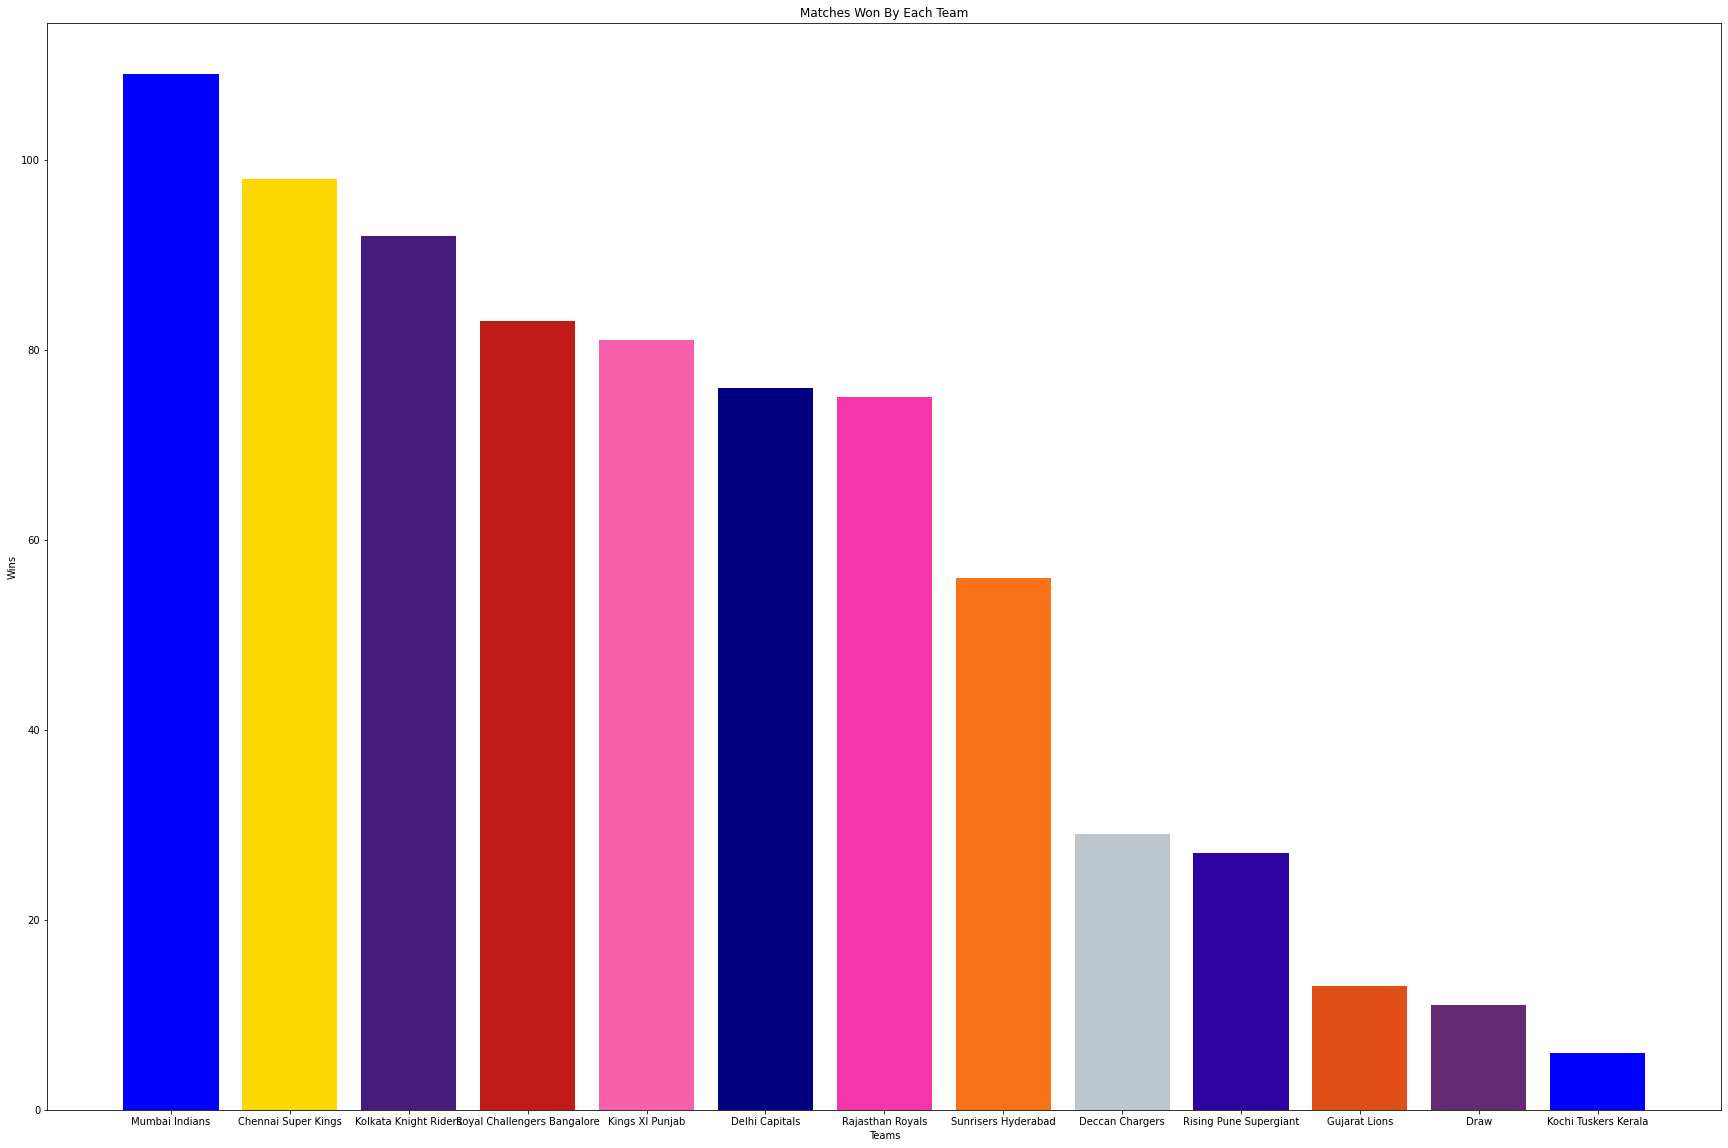

In [119]:
## Total Matches Won By Each Team

winner_df = ipl_df.groupby('winner')[['id']].count()
winner_df = winner_df.sort_values('id', ascending=False).reset_index()
winner_df.rename(columns = {'id':'wins','winner':'Teams'},inplace=True)

plt.figure(figsize=(30,20))
plt.xlabel('Teams')
plt.ylabel('Wins')
plt.title('Matches Won By Each Team');
plt.bar(winner_df.Teams, winner_df.wins, color = ['blue','#FFD801','#461B7E','#C11B17','#F660AB','#000080','#F535AA','#F87217','#BCC6CC','#2C04A2','#E04F16','#632B72']);
winner_df

,Year,Matches
0,IPL-2019,60
1,IPL-2018,60
2,IPL-2017,59
3,IPL-2016,60
4,IPL-2015,59
5,IPL-2014,60
6,IPL-2013,76
7,IPL-2012,74
8,IPL-2011,73
9,IPL-2010,60


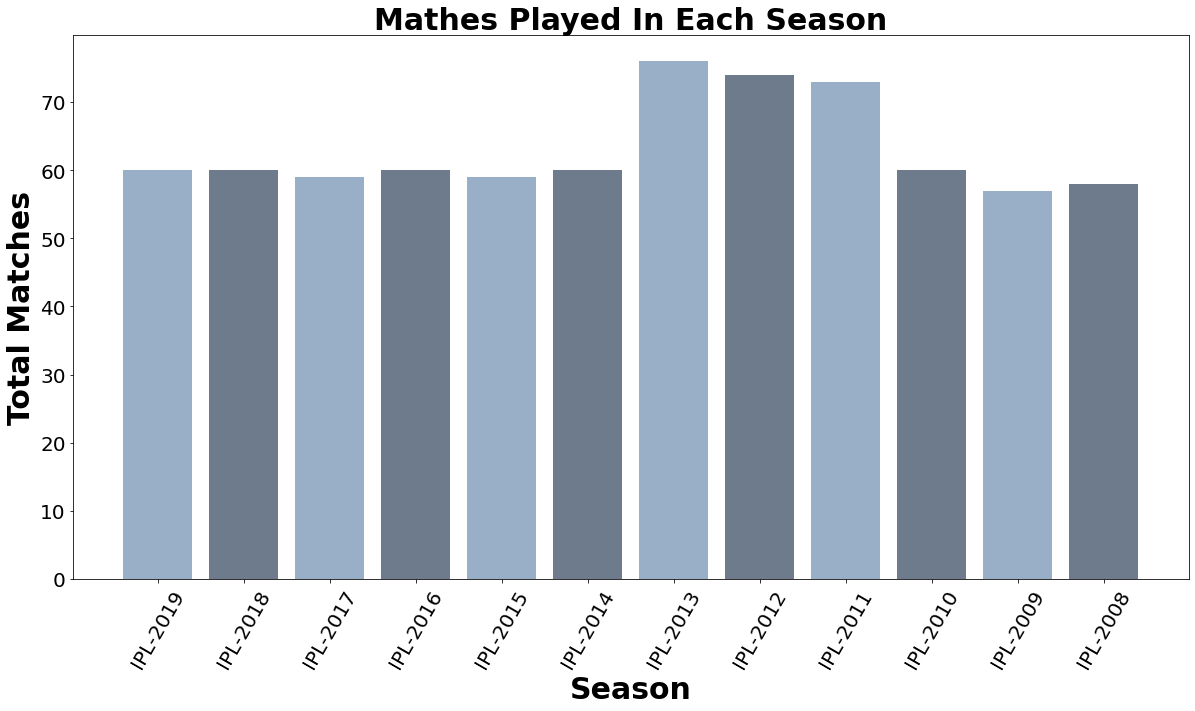

In [127]:
## total matches in each seasons 

season_df = ipl_df.groupby('Season')[['id']].count()
season_df = season_df.sort_values('Season',ascending=False).reset_index()
season_df.rename(columns = {'id':'Matches','Season':'Year'},inplace = True)

plt.figure(figsize=(20,10))
plt.title("Mathes Played In Each Season",fontweight='bold',fontsize=30)
plt.xlabel('Season',fontweight='bold',fontsize=30)
plt.ylabel('Total Matches',fontweight='bold',fontsize=30)
plt.xticks(rotation='60')
plt.tick_params(labelsize=20)
plt.bar(season_df.Year,season_df.Matches,color=['#98AFC7','#6D7B8D']);

season_df

In [128]:
## toss decision 

decision_df = ipl_df.groupby('toss_decision')[['id']].count()
decision_df = decision_df.sort_values('id').reset_index()
decision_df.rename(columns={'id':'Total','toss_decision':'Decision'},inplace=True)
decision_df

,Decision,Total
0,bat,293
1,field,463


In [129]:
## total Venue 
len(ipl_df.venue.unique())

41

,Stadium,Total
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56


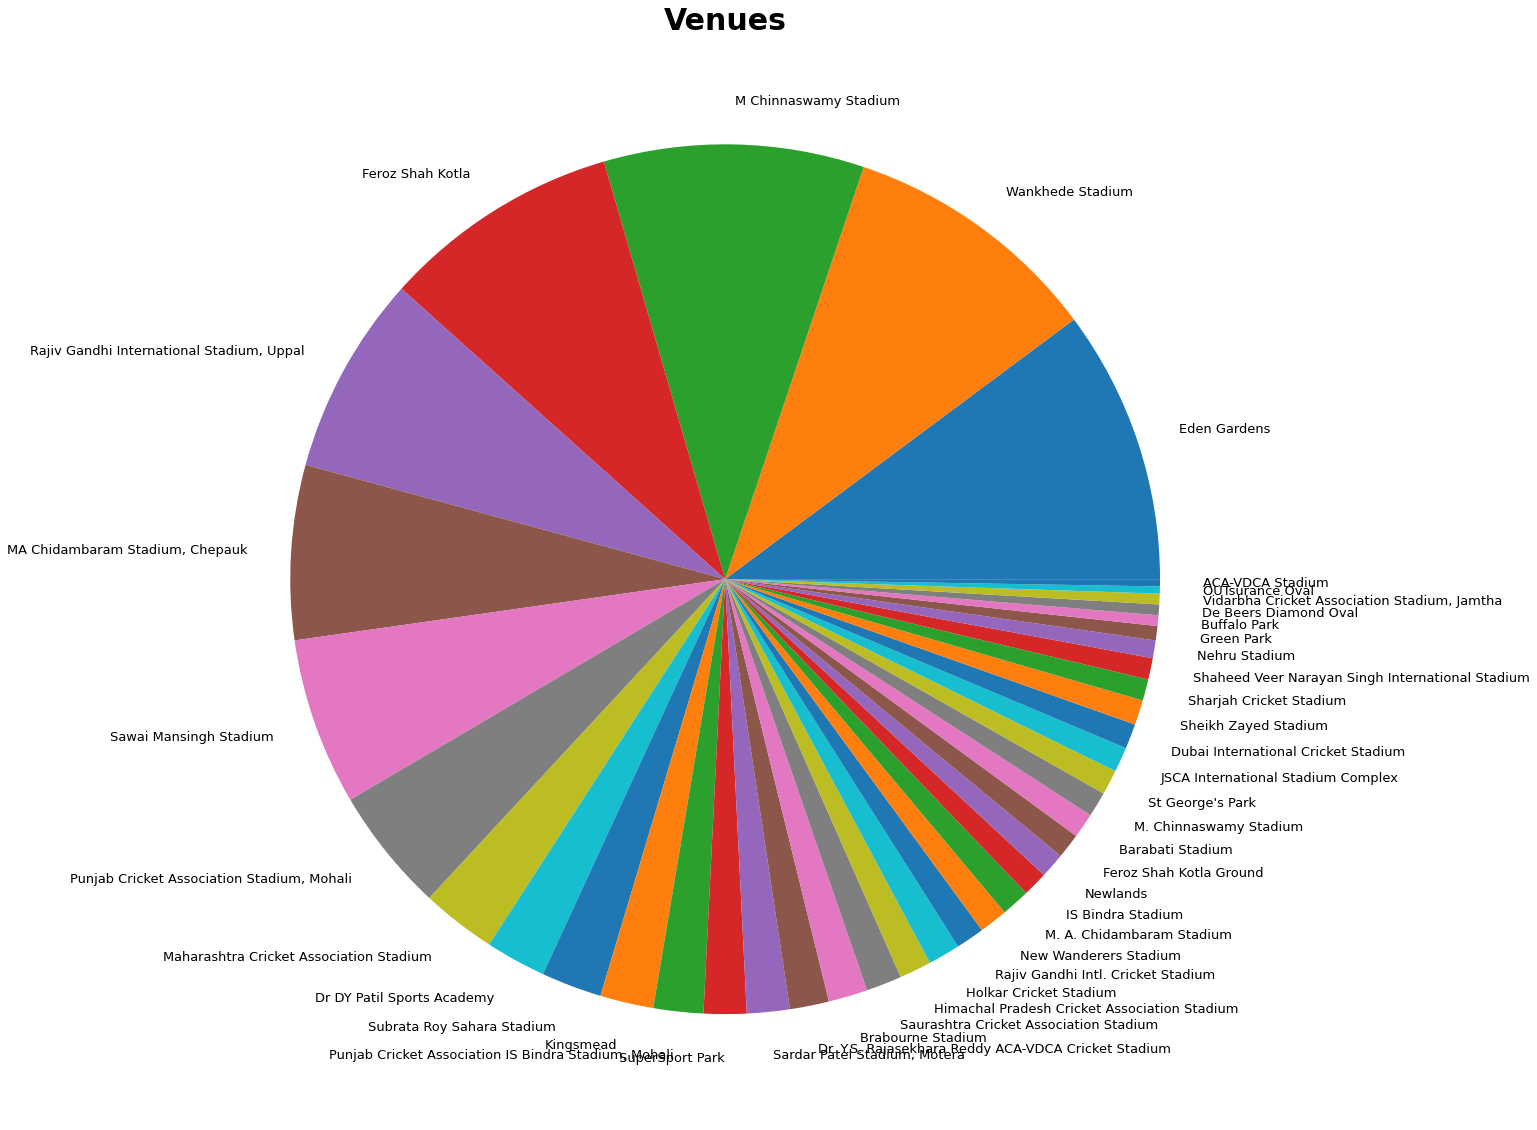

In [136]:
## Venue has hosted the Most Number Of Matches

venue_df = ipl_df.groupby('venue')[['id']].count()
venue_df = venue_df.sort_values('id',ascending=False).reset_index()
venue_df.rename(columns={'id':'Total','venue':'Stadium'},inplace=True)
labels = list(venue_df.Stadium)

plt.figure(figsize=(20,20))
plt.title("Venues",fontweight='bold',fontsize=30)
plt.tick_params(labelsize=40)
plt.pie(venue_df.Total,labels=labels,textprops={'fontsize': 13});

venue_df.head()

In [163]:
## Ipl Trophy Most Number of Times

final_df = ipl_df.groupby('Season').tail(1).copy()
final_df = final_df.sort_values('Season')
final_df


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
116,117,IPL-2008,Mumbai,01-06-2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy
173,174,IPL-2009,Johannesburg,24-05-2009,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium
233,234,IPL-2010,Mumbai,25-04-2010,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy
306,307,IPL-2011,Chennai,28-05-2011,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk"
380,381,IPL-2012,Chennai,27-05-2012,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk"
456,457,IPL-2013,Kolkata,26-05-2013,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens
516,517,IPL-2014,Bangalore,01-06-2014,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium
575,576,IPL-2015,Kolkata,24-05-2015,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens
635,636,IPL-2016,Bangalore,29-05-2016,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium
58,59,IPL-2017,Hyderabad,21-05-2017,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal"


In [164]:
final_df['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

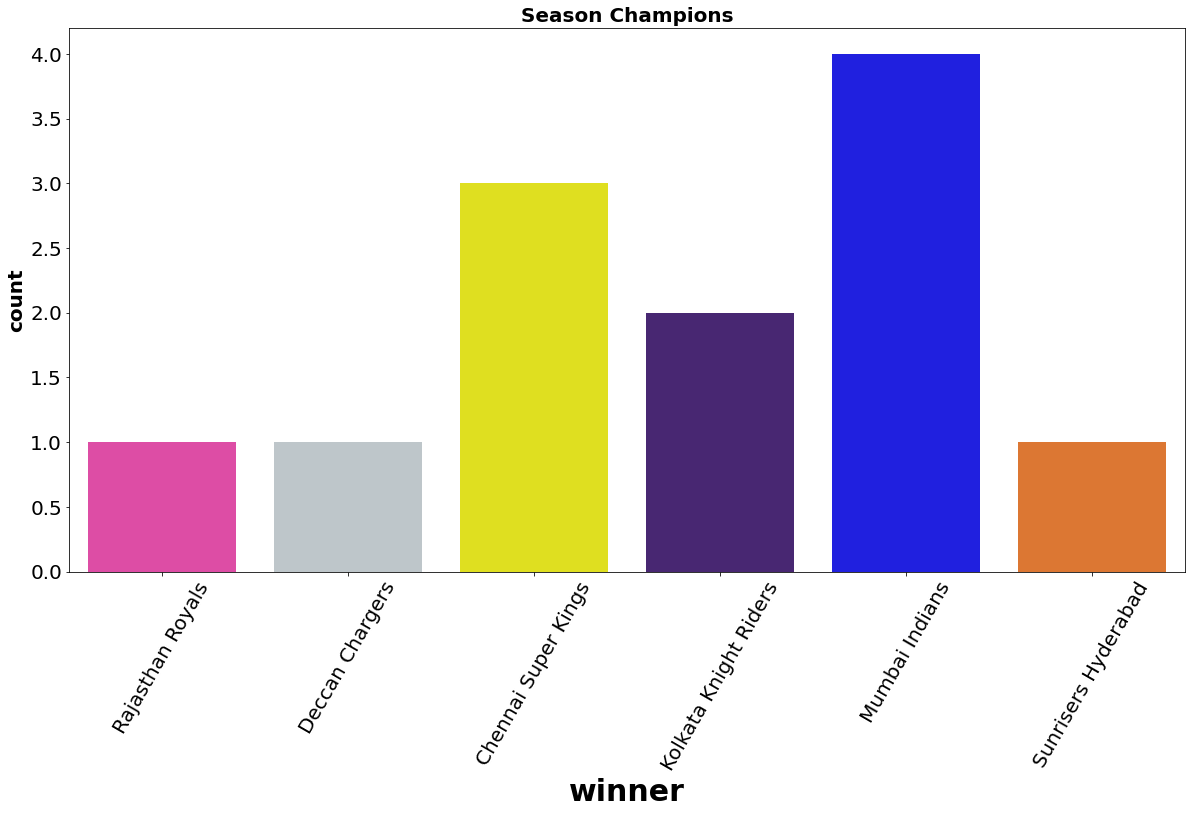

In [171]:
plt.figure(figsize=(20,10))
plt.title("Season Champions",fontweight='bold',fontsize=20)
plt.xlabel('Teams',fontweight='bold',fontsize=30)
plt.ylabel('Total Seasons',fontweight='bold',fontsize=20)
plt.xticks(rotation='60')
plt.tick_params(labelsize=20)
sns.countplot(x=final_df['winner'],palette=['#F535AA','#BCC6CC','yellow','#461B7E','blue','#F87217']);